In [1]:
import os
from pathlib import Path
root = Path('/Users/user/Coding/EV-D68-3C-protease/')
os.chdir(root)

In [ ]:
import pymol2

with pymol2.PyMOL() as pymol:
    pymol.cmd.load('combo.pse')
    pymol.cmd.split_states('hits')
    nearby = pymol.cmd.get_object_list(selection='resn UNK and byres /D68EV3CPROA-x1741_0B_bound//A/HIS`161/NE2 around 3')

In [51]:
nearby

['stolen_hits',
 'hits',
 'x1498_0A_1',
 'x0980_0B_1',
 'x0147_0A_1',
 'x1498_1B_1',
 'x1594_0A_1',
 'x1537_0A_1',
 'x1604_0A_1',
 'x1498_0B_1']

In [2]:
from rdkit import Chem

with Chem.SDMolSupplier('filtered_hits.sdf') as sds:
    hits = list(sds)

OSError: File error: Bad input file filtered_hits.sdf

In [42]:
[n.split('_')[0] for n in nearby]

['stolen',
 'hits',
 'x1498',
 'x0980',
 'x0147',
 'x1498',
 'x1594',
 'x1537',
 'x1604',
 'x1498']

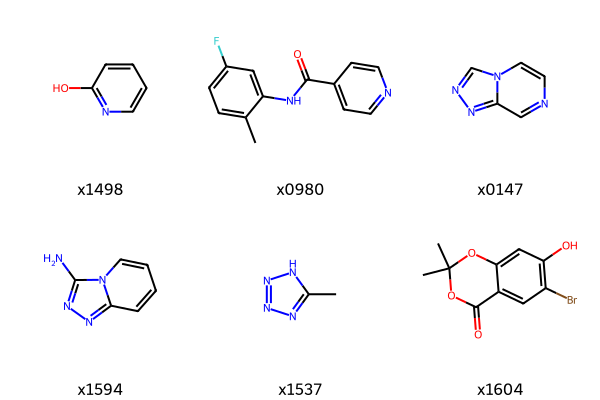

In [49]:
from rdkit.Chem import Draw, AllChem

flattos = {h.GetProp('_Name').split('L')[0]: Chem.Mol(h) for h in hits}
*map(AllChem.Compute2DCoords, flattos.values()),

flattos = {k:v for k,v in flattos.items() if k in [n.split('_')[0] for n in nearby]}

Draw.MolsToGridImage(list(flattos.values()), legends=list(flattos.keys()))

In [50]:
with open('H161_friends.png', 'wb') as fh:
    fh.write(_.data)

In [52]:
!ls

01_reference-making          fragmented_hits.sdf
02_hit-prep                  hits.sdf
03_merge-fragmenstein        images
04_merge_network             metadata-from-Fragalysis.csv
LICENSE                      pymol_snippet_junkyard.md
README.md                    reference.pdb
combo.pse                    stolen_hits.sdf
filtered_hits.sdf            workshop


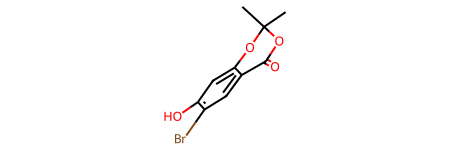

In [67]:
x1604 = {h.GetProp('_Name'): h for h in hits}['x1604L0AP1']
x1604

In [58]:
Chem.MolToSmiles(x1604)

'CC1(C)OC(=O)c2cc(Br)c(O)cc2O1'

In [84]:
bromophenol = Chem.MolFromSmiles('c1cc(Br)c(O)cc1')
bromophenol = Chem.MolFromSmarts('c1:c:c(-Br):c(-[OH1]):c:c:1')

import gzip

expansions = []

with gzip.open('../Functional-subsets-of-Enamine-BB/Enamine_BB_halogen.sdf.gz') as fh:
    with Chem.ForwardSDMolSupplier(fh) as s:
        for mol in s:
            if mol.HasSubstructMatch(bromophenol):
                expansions.append(mol)

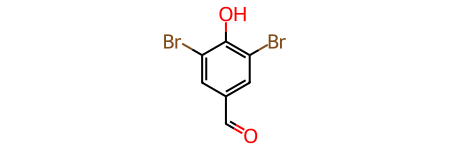

In [85]:
expansions[0]

In [86]:
len(expansions)

2317

In [101]:
with Chem.SDWriter('bromophenolics.sdf') as sd:
    for mol in expansions:
        sd.write(mol)

In [89]:
from rdkit.Chem import PandasTools
import pandas as pd
from pathlib import Path

path = Path.home() / 'Coding' / 'EV-D68-3C-protease' / '02_hit-prep' / 'combined_libraries.csv'

libraries = pd.read_csv(path)

In [90]:
libraries

,Unnamed: 0,Id,SMILES,library,Name
0,0,Y3D-01,CC1(C(N)=O)NCCC1,York3D,NaN
1,1,Y3D-02,CC1(COC)NCCC1,York3D,2-(methoxymethyl)-2-methylpyrrolidine
2,2,Y3D-03,CC1(C(O)=O)N(C(C)=O)CCC1,York3D,NaN
3,3,Y3D-04,CC1(C(N)=O)N(S(=O)(C)=O)CCC1,York3D,NaN
4,4,Y3D-05,CC1(C(O)=O)N(S(=O)(C)=O)CCC1,York3D,NaN
...,...,...,...,...,...
2733,139,Z4605084892,[I-].C[N+]=1C=CC=NC1Br,CovHetFrags,2-bromo-1-methylpyrimidin-1-ium iodide
2734,140,Z4605084895,[I-].[I-].C[N+]1=C[N+](C)(C=C)C=C1,CovHetFrags,"1-ethenyl-1,3-dimethyl-1H-imidazole-1,3-diium ..."
2735,141,Z57205012,[I-].C[N+]=1C=CC=CC1I,CovHetFrags,2-iodo-1-methylpyridin-1-ium iodide
2736,142,Z4605084888,[I-].C[N+]=1C=NC=C(I)C1,CovHetFrags,5-iodo-1-methylpyrimidin-1-ium iodide


In [93]:
# this does not decompose

from rdkit.Chem import BRICS

BRICS.BRICSDecompose(x1604)

{'CC1(C)OC(=O)c2cc(Br)c(O)cc2O1'}

In [94]:
!ls

01_reference-making          hits.sdf
02_hit-prep                  images
03_merge-fragmenstein        metadata-from-Fragalysis.csv
04_merge_network             pymol_snippet_junkyard.md
LICENSE                      reference.pdb
README.md                    stolen_hits.sdf
combo.pse                    temp.py
filtered_hits.sdf            workshop
fragmented_hits.sdf


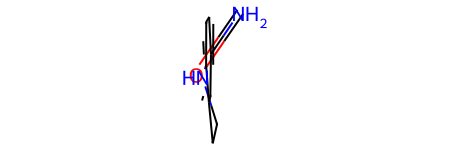

In [96]:
x0771 = {h.GetProp('_Name'): h for h in hits}['x0771L0AP1']
x0771

In [97]:

Chem.MolToMolFile(x1604, 'x1604.mol')
Chem.MolToMolFile(x0771, 'x0771.mol')

In [100]:
Chem.MolToMolFile(Chem.MolFromPDBBlock('''CRYST1   42.834   62.708  147.514  90.00  90.00  90.00 P 21 21 21    1
HETATM    1  O   LIG S  83      -6.112  12.505 -25.876  1.00 29.61           O  
HETATM    2  O   LIG S 164      -6.370   6.502 -34.522  1.00 40.58           O  
END'''), 'nice_HOH.mol')

In [111]:
from rdkit import Geometry

def get_bromine_pos(mol) -> Geometry.Point3D:
    bromine_zahl = 35
    bromine: Chem.Atom = next(mol.GetAtomsMatchingQuery(Chem.rdqueries.AtomNumEqualsQueryAtom(bromine_zahl)))
    br_idx: int = bromine.GetIdx()
    return mol.GetConformer().GetAtomPosition(br_idx)

ref = get_bromine_pos(x1604)
ref

In [114]:

with Chem.SDMolSupplier('rocs-monster2.sdf') as sdr, Chem.SDWriter('rocs-monster2.filtered.sdf') as sdw:
    for mol in sdr:
        if get_bromine_pos(mol).Distance(ref) > 1.:
            continue
        sdw.write(mol)
        

In [116]:
x1604.GetPropsAsDict()

{'XChem_code': 'D68EV3CPROA-x1604',
 'Occupancy': '[0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]',
 'TempFactor': '[72.3, 77.66, 74.79, 71.79, 72.05, 62.52, 75.7, 75.21, 75.25, 76.05, 72.74, 67.77, 70.53, 72.83, 84.1]',
 'RealCrystalName': 'D68EV3CPROA-x1604',
 'smiles': 'CC1(C)OC(=O)C=2C=C(Br)C(O)=CC2O1',
 'new_smiles': 'CC1(C)OC(=O)C=2C=C(Br)C(O)=CC2O1',
 'alternate_name': 'Z1509711879',
 'site_name': 1,
 'pdb_entry': nan,
 'mol': '<rdkit.Chem.rdchem.Mol object at 0x13a26da10>',
 'single_smiles': 'CC1(C)OC(=O)c2cc(Br)c(O)cc2O1',
 'base_name': 'D68EV3CPROA-x1604_0A',
 'lig_resn': 'LIG',
 'lig_resi': 201,
 'lig_chain': 'A',
 'lig_segi': '',
 'lig_alt': '',
 'polymer_chain': 'A'}

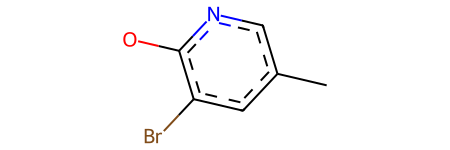

In [151]:
# 3-bromo-4-methylpyridin-2-ol
paramethylbromopyridinol = Chem.MolFromSmarts('c1:c(-C):c(-Br):c(-[OH1]):n:c:1')
# 3-bromo-5-methylpyridin-2-ol
metamethylbromopyridinol = Chem.MolFromSmarts('c1(-C):c:c(-Br):c(-[OH1]):n:c:1')
metamethylbromopyridinol

In [152]:
expansions = []

with gzip.open('../Functional-subsets-of-Enamine-BB/Enamine_BB_halogen.sdf.gz') as fh:
    with Chem.ForwardSDMolSupplier(fh) as s:
        for mol in s:
            if mol.HasSubstructMatch(metamethylbromopyridinol) or mol.HasSubstructMatch(paramethylbromopyridinol):
                expansions.append(mol)

In [160]:
from rdkit.Chem import TemplateAlign

ref = Chem.MolFromSmiles('c1:c:c(-Br):c(-[OH1]):n:c:1')
AllChem.Compute2DCoords(ref)

for mol in expansions:
    TemplateAlign.AlignMolToTemplate2D(mol, ref, clearConfs=True)

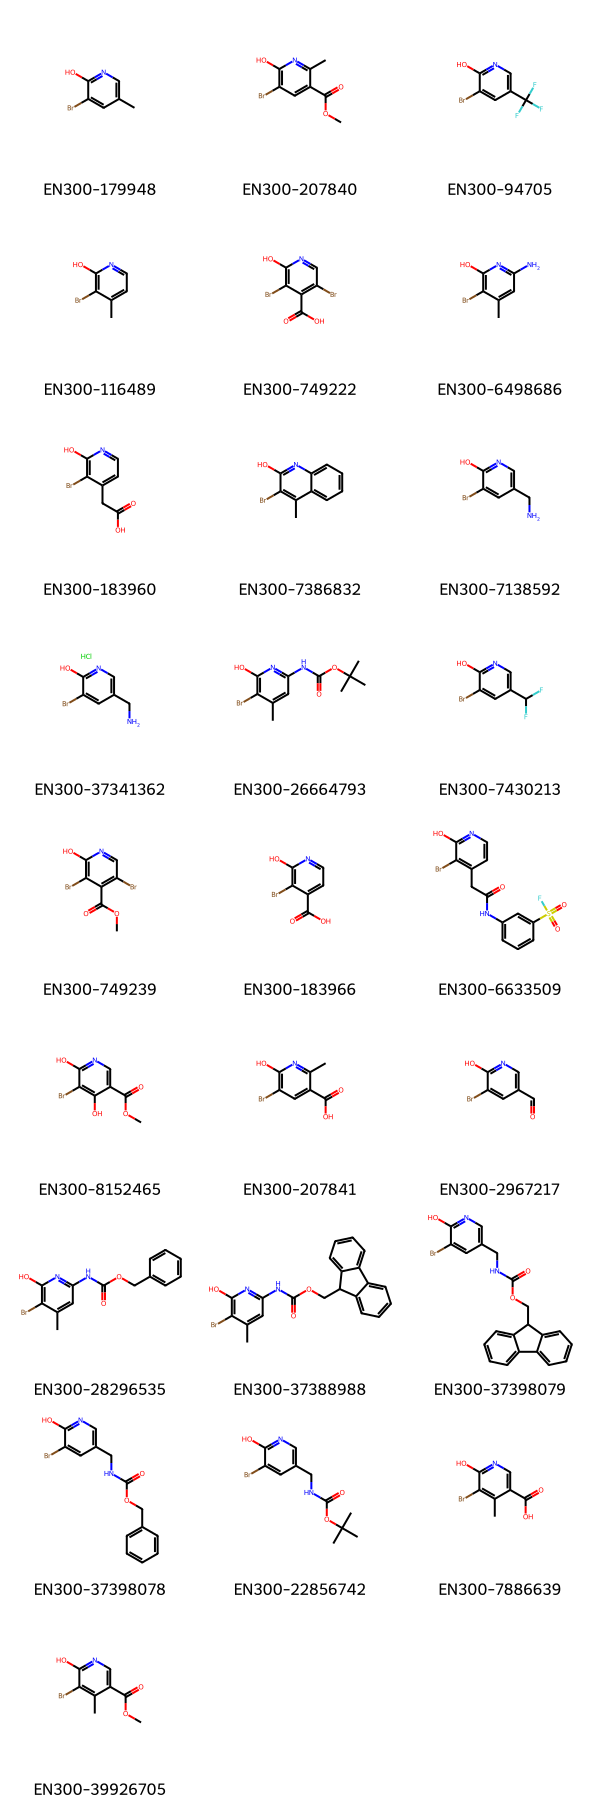

In [163]:
Draw.MolsToGridImage(expansions, legends=[m.GetProp('id') for m in expansions])

In [164]:
with open('images/bromomethylpyridinol-BB.png', 'wb') as fh:
    fh.write(_.data)

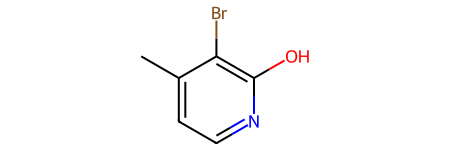

In [145]:
Chem.MolFromSmiles('c1:c(-C):c(-Br):c(-[OH1]):n:c:1')

In [181]:
from STOUT import translate_forward

translate_forward(Chem.MolToSmiles(Chem.MolFromSmiles('c1:c:c(-Br):c(-[OH1]):c(-[NH2]):c:1')))

'2-amino-6-bromophenol'

In [184]:
Chem.MolToSmiles(Chem.MolFromSmiles('c1:c:c(-Br):c(-[OH1]):c(-[NH2]):c:1'))

'Nc1cccc(Br)c1O'

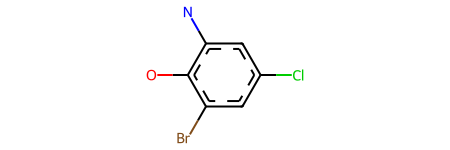

In [192]:
Chem.MolFromSmarts('c1(-Cl):c:c(-Br):c(-[OH1]):c(-N):c:1')

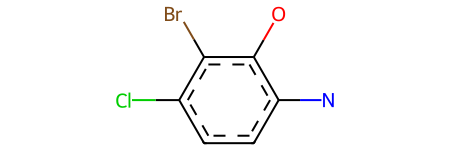

In [199]:
ref

In [198]:
expansions = []

ref = Chem.MolFromSmarts('c1:c(-Cl):c(-Br):c(-[OH1]):c(-N):c:1')

with gzip.open('../Functional-subsets-of-Enamine-BB/Enamine_BB_halogen.sdf.gz') as fh:
    with Chem.ForwardSDMolSupplier(fh) as s:
        for mol in s:
            if mol.HasSubstructMatch(ref):
                expansions.append(mol)
                    
                    
print(len(expansions))

AllChem.Compute2DCoords(ref)

for mol in expansions:
    TemplateAlign.AlignMolToTemplate2D(mol, ref, clearConfs=True)
    
Draw.MolsToGridImage(expansions, legends=[m.GetProp('id') for m in expansions]) 

0


[13:36:28] 

****
Pre-condition Violation
no draw context
Violation occurred on line 214 in file /Users/runner/work/rdkit-pypi/rdkit-pypi/build/temp.macosx-11.0-arm64-cpython-310/rdkit/Code/GraphMol/MolDraw2D/MolDraw2DCairo.cpp
Failed Expression: dp_cr
****



RuntimeError: Pre-condition Violation
	no draw context
	Violation occurred on line 214 in file Code/GraphMol/MolDraw2D/MolDraw2DCairo.cpp
	Failed Expression: dp_cr
	RDKIT: 2022.09.5
	BOOST: 1_78


In [183]:
# with open('images/amino-6-bromophenol-BB.png', 'wb') as fh:
#     fh.write(_.data)

In [210]:
# place against x1604

'c1cc(-Br)c(-[OH1])c(-N)c1'
'c1cc(-Br)c(-[OH1])nc1'
'c1cc(-Br)c(-[OH1])cc1'

# place against 0x771

'NC(=O)c1ccc2c(c1)CCN2'
'NC(=O)c1cccc(c1)'

'NC(=O)c1cccc(c1)'

In [9]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, PandasTools, BRICS
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
import pandera.typing as pdt
from typing import List, Dict

hitdex: Dict[str, Chem.Mol] = {}
with Chem.SDMolSupplier('hits.sdf') as sds:
    for mol in sds:
        hitdex[mol.GetProp('_Name')] = mol
    
    
with open('reference.pdb') as fh:
    pdbblock = fh.read()
    
# ------------------------------------------------------
    
import logging
import pyrosetta_help as ph
import pyrosetta

logger = ph.configure_logger()
logger.handlers[0].setLevel(logging.ERROR)  # logging.WARNING = 30
extra_options = ph.make_option_string(no_optH=False,
                                      ex1=None,
                                      ex2=None,
                                      #mute='all',
                                      ignore_unrecognized_res=True,
                                      load_PDB_components=False,
                                      ignore_waters=True)
pyrosetta.init(extra_options=extra_options)

/Users/user/.conda/envs/py310/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


NGlView import failed: 'super' object has no attribute '_ipython_display_'
PyRosetta-4 2023 [Rosetta PyRosetta4.Release.python310.m1 2023.16+release.942c01d5066fd96860b7d268702b832fe906a739 2023-04-12T15:05:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.


In [249]:
import logging

Victor.enable_stdout(logging.ERROR)
Victor.journal.setLevel(logging.ERROR)

vicky = Victor([x1604], pdb_block=pdbblock)

In [241]:
vicky.place('c1cc(-Br)c(-[OH1])c(-N)c1', long_name='aminobromophenol')
vicky.summarize()

{'name': 'aminobromophenol',
 'smiles': 'c1cc(-Br)c(-[OH1])c(-N)c1',
 'error': '',
 'mode': 'expansion',
 '∆∆G': -2.1452503404489907,
 '∆G_bound': -2.0743316421518387,
 '∆G_unbound': 0.0709186982971519,
 'comRMSD': 0.31950430357039017,
 'N_constrained_atoms': 10,
 'N_unconstrained_atoms': 1,
 'runtime': 264.5507640838623,
 'regarded': ['x1604L0AP1'],
 'disregarded': []}

In [235]:
vicky.place('c1cc(-Br)c(-[OH1])c(-CN)c1', long_name='aminomethylbromophenol')
vicky.summarize()

{'name': 'aminomethylbromophenol',
 'smiles': 'c1cc(-Br)c(-[OH1])c(-CN)c1',
 'error': '',
 'mode': 'expansion',
 '∆∆G': -1.7525278070385768,
 '∆G_bound': -1.6960790652362967,
 '∆G_unbound': 0.0564487418022801,
 'comRMSD': 0.7831770553329556,
 'N_constrained_atoms': 10,
 'N_unconstrained_atoms': 2,
 'runtime': 37.772018909454346,
 'regarded': ['x1604L0AP1'],
 'disregarded': []}

In [237]:
vicky.place('c1cc(-Br)c(-[OH1])cc1', long_name='bromophenol')
vicky.summarize()

{'name': 'bromophenol',
 'smiles': 'c1cc(-Br)c(-[OH1])cc1',
 'error': '',
 'mode': 'expansion',
 '∆∆G': -2.66527194619126,
 '∆G_bound': -2.6299377607299164,
 '∆G_unbound': 0.03533418546134374,
 'comRMSD': 0.27316313806954284,
 'N_constrained_atoms': 10,
 'N_unconstrained_atoms': 0,
 'runtime': 118.37091827392578,
 'regarded': ['x1604L0AP1'],
 'disregarded': []}

In [239]:
vicky.place('c1cc(-Br)c(-[OH1])nc1', long_name='bromopyrimidol')
vicky.summarize()

{'name': 'bromopyrimidol',
 'smiles': 'c1cc(-Br)c(-[OH1])nc1',
 'error': '',
 'mode': 'expansion',
 '∆∆G': -1.5866155112216564,
 '∆G_bound': -1.5479949352891536,
 '∆G_unbound': 0.038620575932502885,
 'comRMSD': 0.2922178981513621,
 'N_constrained_atoms': 10,
 'N_unconstrained_atoms': 0,
 'runtime': 168.3264660835266,
 'regarded': ['x1604L0AP1'],
 'disregarded': []}

In [243]:
vicky.place('c1cc(-Br)c(-[OH1])c(CO)c1', long_name='hydroxymethylbromophenol')
vicky.summarize()

{'name': 'hydroxymethylbromophenol',
 'smiles': 'c1cc(-Br)c(-[OH1])c(CO)c1',
 'error': '',
 'mode': 'expansion',
 '∆∆G': -1.7296296974315464,
 '∆G_bound': -1.4759565840514988,
 '∆G_unbound': 0.2536731133800475,
 'comRMSD': 0.8707541558901684,
 'N_constrained_atoms': 10,
 'N_unconstrained_atoms': 2,
 'runtime': 516.2787940502167,
 'regarded': ['x1604L0AP1'],
 'disregarded': []}

In [245]:
vicky.place('c1cc(-Br)c(-[OH1])c(-Br)c1', long_name='dibromophenol')
vicky.summarize()

{'name': 'dibromophenol',
 'smiles': 'c1cc(-Br)c(-[OH1])c(-Br)c1',
 'error': '',
 'mode': 'expansion',
 '∆∆G': -0.02140689121690882,
 '∆G_bound': 0.020613386202740613,
 '∆G_unbound': 0.042020277419649435,
 'comRMSD': 1.1841882029474877,
 'N_constrained_atoms': 10,
 'N_unconstrained_atoms': 1,
 'runtime': 634.1020500659943,
 'regarded': ['x1604L0AP1'],
 'disregarded': []}

In [248]:
vicky.place('c1cc(-Br)c(-[OH1])c(O)c1', long_name='hydroxybromophenol')
vicky.summarize()

{'name': 'hydroxybromophenol',
 'smiles': 'c1cc(-Br)c(-[OH1])c(O)c1',
 'error': '',
 'mode': 'expansion',
 '∆∆G': -2.8779479255669367,
 '∆G_bound': -2.8077390150763497,
 '∆G_unbound': 0.07020891049058675,
 'comRMSD': 0.3352800322118812,
 'N_constrained_atoms': 10,
 'N_unconstrained_atoms': 1,
 'runtime': 947.2654161453247,
 'regarded': ['x1604L0AP1'],
 'disregarded': []}

In [258]:
vicky.place('c1cc(-Br)c(-[OH1])c(-N)c1', long_name='aminobromophenol')
aminobromophenol = vicky.minimized_mol

vicky.place('c1cc(-Br)c(-[OH1])c(O)c1', long_name='hydroxybromophenol')
hydroxybromophenol = vicky.minimized_mol

vicky.place('c1cc(-Br)c(-[OH1])cc1', long_name='bromophenol')
bromophenol = vicky.minimized_mol

aminobromophenol.SetProp('_Name', 'x1604amino')
hydroxybromophenol.SetProp('_Name', 'x1604hydroxyl')
bromophenol.SetProp('_Name', 'x1604base')

In [257]:
Chem.MolToSmiles(bromophenol)

'[H]Oc1c([H])c([H])c([H])c([H])c1Br'

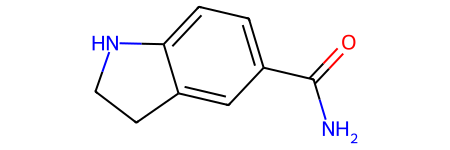

In [263]:
vicky = Victor([x0771], pdb_block=pdbblock)

vicky.place('NC(=O)c1ccc2c(c1)CCN2', long_name='x0771-self')
vicky.summarize()

{'name': 'x0771-self',
 'smiles': 'NC(=O)c1ccc2c(c1)CCN2',
 'error': '',
 'mode': 'expansion',
 '∆∆G': -4.003363042673663,
 '∆G_bound': -3.839610886299445,
 '∆G_unbound': 0.16375215637421855,
 'comRMSD': 0.6292274363587995,
 'N_constrained_atoms': 12,
 'N_unconstrained_atoms': 0,
 'runtime': 11.037117958068848,
 'regarded': ['x0771L1AP1'],
 'disregarded': []}

In [266]:
vicky = Victor([x0771], pdb_block=pdbblock)

vicky.place('NC(=O)c1ccccc1', long_name='x0771benzo')
vicky.summarize()

{'name': 'x0771benzo',
 'smiles': 'NC(=O)c1ccccc1',
 'error': '',
 'mode': 'expansion',
 '∆∆G': -4.2517677603657456,
 '∆G_bound': -4.135372386373347,
 '∆G_unbound': 0.11639537399239844,
 'comRMSD': 0.6543435294594536,
 'N_constrained_atoms': 11,
 'N_unconstrained_atoms': 0,
 'runtime': 7.456783056259155,
 'regarded': ['x0771L1AP1'],
 'disregarded': []}

In [267]:
x0771benzo = vicky.minimized_mol
x0771benzo.SetProp('_Name','x0771benzo')

In [277]:
with Chem.SDWriter('trimmed_x0771-x1604.sdf') as s:
    s.write(x0771benzo)
    s.write(bromophenol)    
    s.write(aminobromophenol)
    s.write(hydroxybromophenol)

acceptables.pkl.gz combinations.sdf   interactions.csv   placements.sdf
combinations.csv   fragpipe.ipynb     placements.csv


In [282]:
import pandas as pd

group1 = ('x1083L0AP1', 'x1305L0BP1', 'x1247L0AP1')
group2 = ('x0789L0AP1',
 'x0980L0BP1',
 'x1604L0AP1',
 'x1594L0AP1',
 'x0147L0AP1',
 'x0771L1AP1','x0771benzo', 'x1604base', 'x1604amino', 'x1604hydroxyl')
group3 = ('x1285L0BP1')

intxns = pd.read_csv('03_merge-fragmenstein/interactions.csv')

In [310]:
{0, 1}

True

In [325]:
def groupify(name):
    bleached_name = name.replace('_', 'L').replace('§', 'P')
    if bleached_name in group1:
        return 1
    elif bleached_name in group2:
        return 2
    elif bleached_name in group3:
        return 3
    else:
        return 0
    
def allgroupify(names):
    if isinstance(names, list):
        return {groupify(n) for n in names}
    return set()


import json
intxns['grouped'] = intxns['regarded'].str.replace('[\'', '').str.replace('\']', '').str.split("', '").apply(allgroupify)

intxns['grouped'].loc[(intxns['grouped'].apply(len) > 1)]

5      {0, 2}
10     {0, 2}
14     {0, 2}
19     {0, 2}
26     {0, 2}
30     {0, 2}
31     {0, 2}
32     {0, 2}
35     {0, 2}
37     {0, 2}
38     {0, 2}
42     {0, 2}
44     {0, 2}
45     {0, 2}
47     {0, 2}
53     {0, 2}
59     {0, 2}
60     {0, 2}
62     {0, 2}
64     {0, 2}
68     {0, 2}
72     {0, 2}
74     {0, 2}
76     {0, 2}
77     {0, 2}
81     {0, 2}
82     {0, 2}
92     {0, 2}
98     {0, 2}
103    {0, 2}
108    {0, 2}
111    {0, 2}
112    {0, 2}
117    {0, 2}
137    {0, 2}
145    {0, 2}
149    {0, 2}
Name: grouped, dtype: object

In [326]:
intxns['N_atoms'] = intxns['N_constrained_atoms'] + intxns['N_unconstrained_atoms']

In [332]:
intxns.sort_values('N_atoms', ascending=False)[['name','regarded', 'grouped', '∆∆G']].head(50)

,name,regarded,grouped,∆∆G
58,Z5287897491,"['x1247_0A§1', 'x1305_0B§1']",{1},-3.362321
21,Z1738331684,"['x1247_0A§1', 'x1305_0B§1']",{1},-4.564468
28,PV-002744392597,"['x1247_0A§1', 'x1305_0B§1']",{1},-4.380799
43,Z1203949181,"['x1247_0A§1', 'x1083_0A§1']",{1},-3.711611
25,Z643160412,"['x1247_0A§1', 'x1305_0B§1']",{1},-4.486572
147,PV-006301229662,"['x0789_0A§1', 'x0771_1A§1']",{2},-1.211209
106,PV-004268637627,"['x0789_0A§1', 'x0771_1A§1']",{2},-2.388438
153,PV-006153363717,"['x0771_1A§1', 'x0789_0A§1']",{2},-1.066821
90,PV-005271719018,"['x0980_0B§1', 'x0147_0A§1']",{2},-2.696173
15,Z1823158581,"['x0980_0B§1', 'x0147_0A§1']",{2},-4.945993


In [50]:
hitdex = {hit.GetProp('_Name'): hit for hit in Chem.SDMolSupplier('filtered_hits.sdf')}

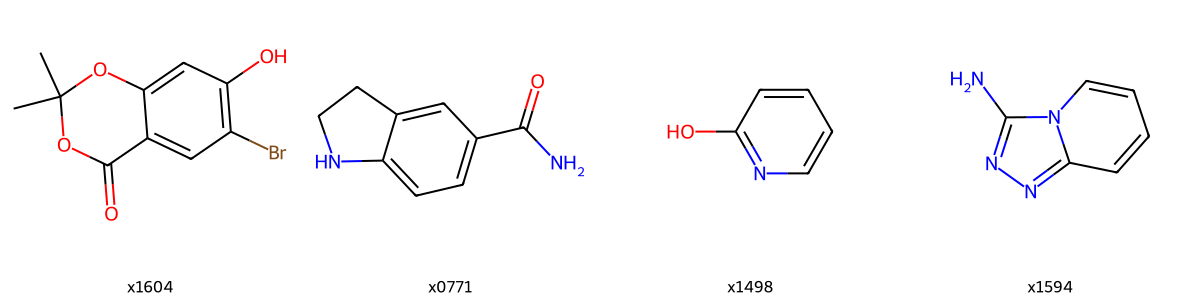

In [51]:
from rdkit.Chem import Draw, AllChem

x1604 = hitdex['x1604L0AP1']
x0771 = hitdex['x0771L1AP1']
x1498 = hitdex['x1498L0BP1']
x1594 = hitdex['x1594L0AP1']

x = *map(Chem.Mol, [x1604, x0771, x1498, x1594]),
*map(AllChem.Compute2DCoords, x),

Draw.MolsToGridImage(x, legends=['x1604', 'x0771', 'x1498', 'x1594'], molsPerRow=4, subImgSize=(300,300))

In [52]:
help(Draw.MolsToGridImage)

Help on function ShowMols in module rdkit.Chem.Draw.IPythonConsole:

ShowMols(mols, maxMols=50, **kwargs)



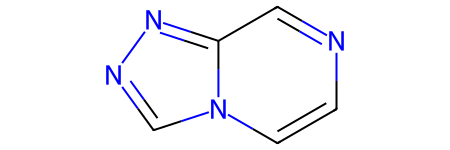

In [53]:
#Chem.MolFromSmiles(Chem.MolToSmiles(hitdex['x0980L0BP1']))

# x0789L0AP1
# x1498L0AP1
# x1537_0A_1

Chem.MolFromSmiles(Chem.MolToSmiles(hitdex['x0147L0AP1']))

In [54]:
import clipboard

clipboard.copy( Chem.MolToSmiles(x1594) )

In [55]:
import logging
import pyrosetta_help as ph
import pyrosetta

logger = ph.configure_logger()
logger.handlers[0].setLevel(logging.ERROR)  # logging.WARNING = 30
extra_options = ph.make_option_string(no_optH=False,
                                      ex1=None,
                                      ex2=None,
                                      #mute='all',
                                      ignore_unrecognized_res=True,
                                      load_PDB_components=False,
                                      ignore_waters=True)
pyrosetta.init(extra_options=extra_options)


from fragmenstein import Victor, Igor

vicky = Victor([x1594], pdb_filename='reference.pdb')

#ZINC91252472 BBV-79200345 O=C1N=CC=C2C(Br)=NN=C12
#ZINC39193569 EN300-131088 Brc1nnc2ccccn12
#ZINC34320189 BBV-79236296 c1cc2c3c(cccc3c1)N=N2

summaries = []
followups = []
for name, smiles in [('ZINC8616242', 'Nc1nnc2ccccn12'), # self
                     ('ZINC91252472', 'O=C1N=CC=C2C(Br)=NN=C12'),
                     ('ZINC39193569', 'Brc1nnc2ccccn12'),
                     ('ZINC34320189', 'c1cc2c3c(cccc3c1)N=N2')]:
    vicky.place(smiles, long_name=name)
    summaries.append(vicky.summarize())
    followups.append(vicky.minimized_mol)

ZINC8616242 - Folder output/ZINC8616242 exists.


PyRosetta-4 2023 [Rosetta PyRosetta4.Release.python310.m1 2023.16+release.942c01d5066fd96860b7d268702b832fe906a739 2023-04-12T15:05:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.


[11:50:35] Molecule does not have explicit Hs. Consider calling AddHs()
[11:50:35] Molecule does not have explicit Hs. Consider calling AddHs()
ZINC91252472 - Folder output/ZINC91252472 exists.
[11:50:39] Molecule does not have explicit Hs. Consider calling AddHs()
[11:50:39] Molecule does not have explicit Hs. Consider calling AddHs()
ZINC39193569 - Folder output/ZINC39193569 exists.
[11:50:44] Molecule does not have explicit Hs. Consider calling AddHs()
[11:50:44] Molecule does not have explicit Hs. Consider calling AddHs()
ZINC34320189 - Folder output/ZINC34320189 exists.
[11:50:49] Molecule does not have explicit Hs. Consider calling AddHs()
[11:50:49] Molecule does not have explicit Hs. Consider calling AddHs()


In [56]:
import pandas as pd

pd.DataFrame(summaries)

,name,smiles,error,mode,∆∆G,∆G_bound,∆G_unbound,comRMSD,N_constrained_atoms,N_unconstrained_atoms,runtime,regarded,disregarded
0,ZINC8616242,Nc1nnc2ccccn12,,expansion,-1.496625,-1.345749,0.150875,0.263314,10,0,5.373818,[x1594L0AP1],[]
1,ZINC91252472,O=C1N=CC=C2C(Br)=NN=C12,,expansion,-1.106037,-0.968128,0.137908,1.592190,10,2,9.821304,[x1594L0AP1],[]
2,ZINC39193569,Brc1nnc2ccccn12,,expansion,-0.912457,-0.806280,0.106177,0.485365,10,0,14.277075,[x1594L0AP1],[]
3,ZINC34320189,c1cc2c3c(cccc3c1)N=N2,,expansion,-2.884648,-2.874858,0.009790,0.342410,10,2,19.714784,[x1594L0AP1],[]


In [57]:
import requests


def smiles_to_iupac(smiles: str) -> str:
    rep = "iupac_name"
    CACTUS = "https://cactus.nci.nih.gov/chemical/structure/{0}/{1}"
    url = CACTUS.format(smiles, rep)
    response = requests.get(url)
    response.raise_for_status()
    return response.text

smiles_to_iupac('Nc1nnc2ccccn12')

'[1,2,4]triazolo[4,5-a]pyridin-3-amine'

In [58]:
smiles_to_iupac('c1cc2c3c(cccc3c1)N=N2')

HTTPError: 404 Client Error: NOT FOUND for url: https://cactus.nci.nih.gov/chemical/structure/c1cc2c3c(cccc3c1)N=N2/iupac_name

In [59]:
from STOUT import translate_forward

translate_forward('c1cc2c3c(cccc3c1)N=N2')

Metal device set to: Apple M2


'2,3-diazatricyclo[6.3.1.04,12]dodeca-1(11),2,4,6,8(12),9-hexaene'

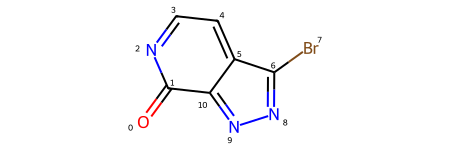

In [71]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.drawOptions.addAtomIndices = True
followup = Chem.MolFromSmiles('O=C1N=CC=C2C(Br)=NN=C12')
followup

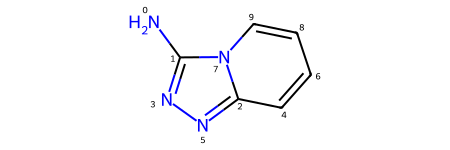

In [73]:
copy = Chem.Mol(vicky.hits[0])
AllChem.Compute2DCoords(copy)
copy

In [74]:
vicky.place(followup, long_name='ZINC91252472',
            custom_map={vicky.hits[0].GetProp('_Name'): {3: 9, 5: 8, 0: 0}})
summaries.append(vicky.summarize())
followups.append(vicky.minimized_mol)

DEBUG:Fragmenstein:ZINC91252472 - is not covalent.
DEBUG:Fragmenstein:ZINC91252472 - Starting parameterisation
DEBUG:Fragmenstein:`from_smiles` called...
DEBUG:Fragmenstein:`load_smiles` called...
DEBUG:Fragmenstein:`load_mol` called...
DEBUG:Fragmenstein:`fix_mol` called...
INFO:Fragmenstein:There are more atoms in mol than were provided.
DEBUG:Fragmenstein:Making all PDBResidueInfo resn=LIG resi=1 chain=X
DEBUG:Fragmenstein:Making all PDBResidueInfo resn=LIG resi=1 chain=X
DEBUG:Fragmenstein:LIG is being converted (`.convert_mol`)
DEBUG:Fragmenstein:Filling ICOOR
DEBUG:Fragmenstein:Current deque rotation count 0
DEBUG:Fragmenstein:Ordering atoms without a shuffle first
DEBUG:Fragmenstein:Ordering atoms by being not hydrogen or dummy
DEBUG:Fragmenstein:Parsing forth line onwards
DEBUG:Fragmenstein:Current deque rotation count 0
DEBUG:Fragmenstein:Ordering atoms without a shuffle first
DEBUG:Fragmenstein:Ordering atoms by distance from root, and being not hydrogen or dummy
DEBUG:Fragme

In [75]:
vicky.summarize()

{'name': 'ZINC91252472',
 'smiles': 'O=C1N=CC=C2C(Br)=NN=C12',
 'error': '',
 'mode': 'expansion',
 '∆∆G': -2.7490091241635843,
 '∆G_bound': -2.611100658450435,
 '∆G_unbound': 0.13790846571314935,
 'comRMSD': 2.047329561485725,
 'N_constrained_atoms': 9,
 'N_unconstrained_atoms': 2,
 'runtime': 91273.18260097504,
 'regarded': ['x1594L0AP1'],
 'disregarded': []}

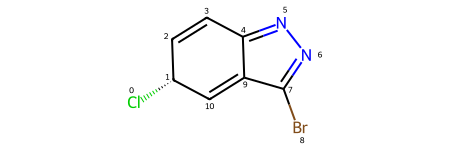

In [76]:
followup = Chem.MolFromSmiles('Cl[C@@H]1C=CC2=NN=C(Br)C2=C1')
followup

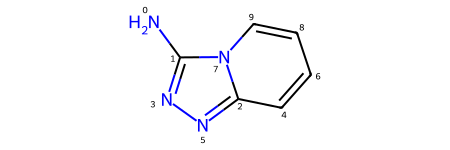

In [77]:
copy

In [80]:
for name, smiles in [('ZINC000725593612', 'Cl[C@H]1C=CC2=NN=C(Br)C2=C1'),
                     ('ZINC000725593613', 'Cl[C@@H]1C=CC2=NN=C(Br)C2=C1'),]:
    vicky.place(Chem.MolFromSmiles(smiles),
                long_name=name, custom_map={vicky.hits[0].GetProp('_Name'): {0: 8, 3: 6, 5:5}})
    summaries.append(vicky.summarize())
    followups.append(vicky.minimized_mol)

DEBUG:Fragmenstein:ZINC000725593612 - is not covalent.
DEBUG:Fragmenstein:ZINC000725593612 - Starting parameterisation
DEBUG:Fragmenstein:`from_smiles` called...
DEBUG:Fragmenstein:`load_smiles` called...
DEBUG:Fragmenstein:`load_mol` called...
DEBUG:Fragmenstein:`fix_mol` called...
INFO:Fragmenstein:There are more atoms in mol than were provided.
DEBUG:Fragmenstein:Making all PDBResidueInfo resn=LIG resi=1 chain=X
DEBUG:Fragmenstein:Making all PDBResidueInfo resn=LIG resi=1 chain=X
DEBUG:Fragmenstein:LIG is being converted (`.convert_mol`)
DEBUG:Fragmenstein:Filling ICOOR
DEBUG:Fragmenstein:Current deque rotation count 0
DEBUG:Fragmenstein:Ordering atoms without a shuffle first
DEBUG:Fragmenstein:Ordering atoms by being not hydrogen or dummy
DEBUG:Fragmenstein:Parsing forth line onwards
DEBUG:Fragmenstein:Current deque rotation count 0
DEBUG:Fragmenstein:Ordering atoms without a shuffle first
DEBUG:Fragmenstein:Ordering atoms by distance from root, and being not hydrogen or dummy
DEBU

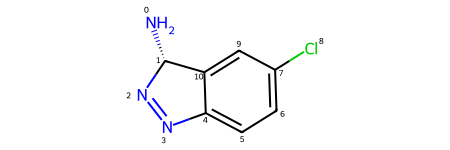

In [86]:
Chem.MolFromSmiles('N[C@H]1N=Nc2ccc(Cl)cc21')

In [90]:
for name, smiles in [('ZINC238664892', 'N[C@H]1N=Nc2ccc(Cl)cc21'),
                     ('ZINC238659177', 'N[C@@H]1N=Nc2ccc(Cl)cc21')
]:
    vicky.place(Chem.MolFromSmiles(smiles),
                long_name=name, custom_map={vicky.hits[0].GetProp('_Name'): {0: 0, 3: 2, 5:3}})
    summaries.append(vicky.summarize())
    followups.append(vicky.minimized_mol)

DEBUG:Fragmenstein:ZINC238664892 - is not covalent.
DEBUG:Fragmenstein:ZINC238664892 - Starting parameterisation
DEBUG:Fragmenstein:`from_smiles` called...
DEBUG:Fragmenstein:`load_smiles` called...
DEBUG:Fragmenstein:`load_mol` called...
DEBUG:Fragmenstein:`fix_mol` called...
INFO:Fragmenstein:There are more atoms in mol than were provided.
DEBUG:Fragmenstein:Making all PDBResidueInfo resn=LIG resi=1 chain=X
DEBUG:Fragmenstein:Making all PDBResidueInfo resn=LIG resi=1 chain=X
DEBUG:Fragmenstein:LIG is being converted (`.convert_mol`)
DEBUG:Fragmenstein:Filling ICOOR
DEBUG:Fragmenstein:Current deque rotation count 0
DEBUG:Fragmenstein:Ordering atoms without a shuffle first
DEBUG:Fragmenstein:Ordering atoms by being not hydrogen or dummy
DEBUG:Fragmenstein:Parsing forth line onwards
DEBUG:Fragmenstein:Current deque rotation count 0
DEBUG:Fragmenstein:Ordering atoms without a shuffle first
DEBUG:Fragmenstein:Ordering atoms by distance from root, and being not hydrogen or dummy
DEBUG:Frag

In [91]:
pd.DataFrame(summaries)

,name,smiles,error,mode,∆∆G,∆G_bound,∆G_unbound,comRMSD,N_constrained_atoms,N_unconstrained_atoms,runtime,regarded,disregarded
0,ZINC8616242,Nc1nnc2ccccn12,,expansion,-1.496625,-1.345749,0.150875,0.263314,10,0,5.373818,[x1594L0AP1],[]
1,ZINC91252472,O=C1N=CC=C2C(Br)=NN=C12,,expansion,-1.106037,-0.968128,0.137908,1.592190,10,2,9.821304,[x1594L0AP1],[]
2,ZINC39193569,Brc1nnc2ccccn12,,expansion,-0.912457,-0.806280,0.106177,0.485365,10,0,14.277075,[x1594L0AP1],[]
3,ZINC34320189,c1cc2c3c(cccc3c1)N=N2,,expansion,-2.884648,-2.874858,0.009790,0.342410,10,2,19.714784,[x1594L0AP1],[]
4,ZINC91252472,O=C1N=CC=C2C(Br)=NN=C12,,expansion,-2.749009,-2.611101,0.137908,2.047330,9,2,91273.182601,[x1594L0AP1],[]
5,ZINC000725593612,Cl[C@H]1C=CC2=NN=C(Br)C2=C1,,expansion,-2.196820,-2.084475,0.112345,0.492929,10,1,93135.097456,[x1594L0AP1],[]
6,ZINC000725593613,Cl[C@@H]1C=CC2=NN=C(Br)C2=C1,,expansion,-2.042735,-1.930392,0.112343,0.446724,10,1,93140.573001,[x1594L0AP1],[]
7,ZINC238664892,N[C@H]1N=Nc2ccc(Cl)cc21,,expansion,-1.603504,-1.511463,0.092040,0.375747,10,1,93697.926873,[x1594L0AP1],[]
8,ZINC238664892,N[C@H]1N=Nc2ccc(Cl)cc21,,expansion,-1.090130,-0.997800,0.092330,0.370178,10,1,93765.820054,[x1594L0AP1],[]
9,ZINC238659177,N[C@@H]1N=Nc2ccc(Cl)cc21,,expansion,-1.750831,-1.658654,0.092177,0.235844,10,1,93772.496777,[x1594L0AP1],[]


In [97]:
vicky = Victor([x1604], pdb_filename='reference.pdb')
# '[N-]=[N+]=NCc1cccc(O)c1Br', azide fails!
vicky.place('C(C1=CC=CC(O)=C1Br)N2N=NC(C)=C2',long_name='ZINC1536013595-rxd')
summaries.append(vicky.summarize())
followups.append(vicky.minimized_mol)

DEBUG:Fragmenstein:ZINC1536013595-rxd - is not covalent.
DEBUG:Fragmenstein:ZINC1536013595-rxd - Starting parameterisation
DEBUG:Fragmenstein:`from_smiles` called...
DEBUG:Fragmenstein:`load_smiles` called...
DEBUG:Fragmenstein:`load_mol` called...
DEBUG:Fragmenstein:`fix_mol` called...
DEBUG:Fragmenstein:LIG is being converted (`.convert_mol`)
DEBUG:Fragmenstein:Filling ICOOR
DEBUG:Fragmenstein:Current deque rotation count 0
DEBUG:Fragmenstein:Ordering atoms without a shuffle first
DEBUG:Fragmenstein:Ordering atoms by being not hydrogen or dummy
DEBUG:Fragmenstein:Parsing forth line onwards
DEBUG:Fragmenstein:Current deque rotation count 0
DEBUG:Fragmenstein:Ordering atoms without a shuffle first
DEBUG:Fragmenstein:Ordering atoms by distance from root, and being not hydrogen or dummy
DEBUG:Fragmenstein:Current deque rotation count -1
DEBUG:Fragmenstein:Current deque rotation count -2
DEBUG:Fragmenstein:Current deque rotation count -3
DEBUG:Fragmenstein:Current deque rotation count -4


In [85]:
!pwd

/Users/user/Coding/EV-D68-3C-protease


In [99]:
## OTHER SIDE

phehit_names = ('x1083L0AP1','x1247L0AP1','x1305L0BP1')

phehits = {k: hitdex[k] for k in phehit_names}


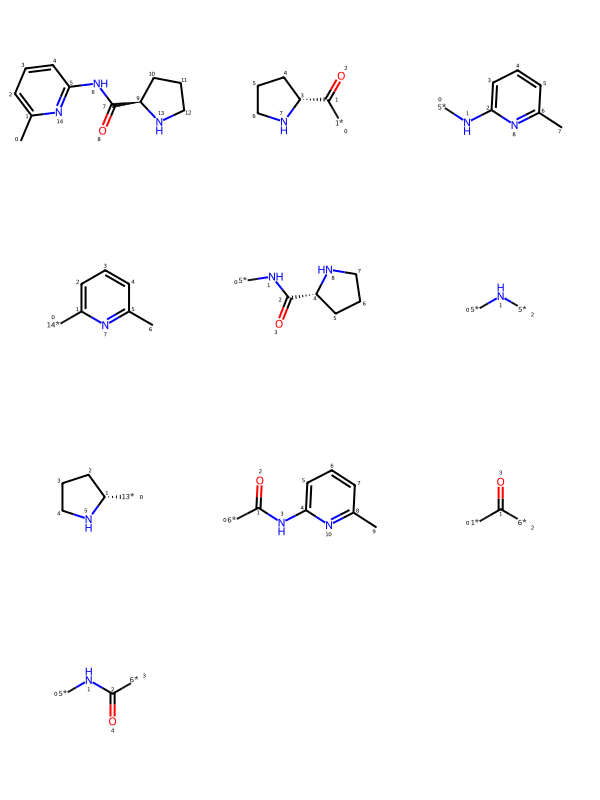

In [152]:
from rdkit.Chem import BRICS

parts = BRICS.BRICSDecompose(hitdex['x1247L0AP1'], returnMols=True, keepNonLeafNodes=True)

Draw.MolsToGridImage([Chem.MolFromSmiles(Chem.MolToSmiles(mol)) for mol in parts])

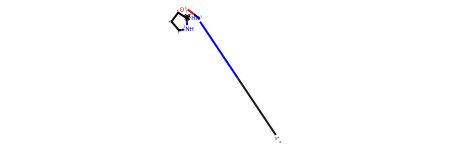

In [155]:
x1247relevant: Chem.Mol = list(parts)[4]
x1247relevant

In [162]:
for dummy in x1247relevant.GetAtomsMatchingQuery(AllChem.AtomNumEqualsQueryAtom(0)):
    print(dummy.GetSymbol())
    dummy.SetAtomicNum(1)

x1247relevant = AllChem.RemoveAllHs(x1247relevant)
x1247relevant.SetProp('_Name', 'x1247relevant')

In [163]:
waters = Chem.MolFromPDBBlock('''HETATM    1  O   XXX S   1      -8.361  13.856 -32.231  1.00 26.80           O
HETATM    2  N   XXX S   1      -9.596  12.477 -34.426  0.66 26.22           N
''')

In [164]:
with Chem.SDWriter('phe-cluster.sdf') as sdf:
    sdf.write(x1247relevant)
    sdf.write(hitdex['x1083L0AP1'])
    sdf.write(hitdex['x1305L0BP1'])
    sdf.write(waters)

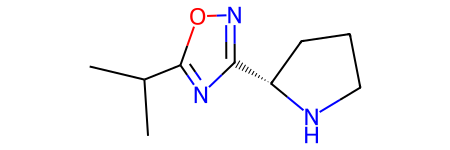

In [4]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, PandasTools, BRICS
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
import pandera.typing as pdt
from typing import List, Dict

hitdex: Dict[str, Chem.Mol] = {}
with Chem.SDMolSupplier('hits.sdf') as sds:
    for mol in sds:
        hitdex[mol.GetProp('_Name')] = mol


hitdex['x1305_0B§1']

In [3]:
hitdex

{'x0133_1B§1': <rdkit.Chem.rdchem.Mol at 0x1672f9310>,
 'x0133_1B§2': <rdkit.Chem.rdchem.Mol at 0x1672f9380>,
 'x0128_0A§1': <rdkit.Chem.rdchem.Mol at 0x1672f93f0>,
 'x0128_0A§2': <rdkit.Chem.rdchem.Mol at 0x1672f9460>,
 'x1052_0A§1': <rdkit.Chem.rdchem.Mol at 0x1672f94d0>,
 'x1532_0B§1': <rdkit.Chem.rdchem.Mol at 0x1672f9540>,
 'x0878_0B§1': <rdkit.Chem.rdchem.Mol at 0x1672f95b0>,
 'x1300_0A§1': <rdkit.Chem.rdchem.Mol at 0x1672f9620>,
 'x1495_0B§1': <rdkit.Chem.rdchem.Mol at 0x1672f9690>,
 'x1585_0B§1': <rdkit.Chem.rdchem.Mol at 0x1672f9700>,
 'x1576_0B§1': <rdkit.Chem.rdchem.Mol at 0x1672f9770>,
 'x1498_0A§1': <rdkit.Chem.rdchem.Mol at 0x1672f97e0>,
 'x1498_0A§2': <rdkit.Chem.rdchem.Mol at 0x1672f9850>,
 'x1498_0A§3': <rdkit.Chem.rdchem.Mol at 0x1672f98c0>,
 'x1649_0A§1': <rdkit.Chem.rdchem.Mol at 0x1672f9930>,
 'x0818_0B§1': <rdkit.Chem.rdchem.Mol at 0x1672f99a0>,
 'x1374_0A§1': <rdkit.Chem.rdchem.Mol at 0x1672f9a10>,
 'x0232_0B§1': <rdkit.Chem.rdchem.Mol at 0x1672f9a80>,
 'x0771_1A

In [11]:
!ls workshop/D68EV3CPROA/aligned/D68EV3CPROA-x0881_0B

D68EV3CPROA-x0881_0B_bound.pdb


In [22]:
import pymol2

with pymol2.PyMOL() as pymol:
    pymol.cmd.load('reference.pdb')
    for name, chain in [('x1083', 'A'), ('x1305', 'B'), ('x1247', 'A')]:
        pymol.cmd.load(f'workshop/D68EV3CPROA/aligned/D68EV3CPROA-{name}_0{chain}/D68EV3CPROA-{name}_0{chain}_bound.pdb',
                       name)
        pymol.cmd.align(f'%{name} and chain {chain}', 'reference')
    pymol.cmd.show('sticks', 'byres resn LIG around 4')
    pymol.cmd.set('grid_mode', 1)
    pymol.cmd.disable('reference')
    pymol.cmd.set('grid_slot', 1, 'x1083')
    pymol.cmd.set('grid_slot', 2, 'x1305')
    pymol.cmd.set('grid_slot', 3, 'x1247')
    pymol.cmd.set('use_shaders', 0)
    pymol.cmd.set('ray_trace_mode', 3)
    pymol.cmd.bg_color('white')
    pymol.cmd.save('phe-site.pse')

In [ ]:
x1083L0AP1 x1305L0BP1 x1247L0AP1

